# Soybean Classification Project

In [ ]:
import os
from PIL import Image, ImageOps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import shutil
from random import sample

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from keras.callbacks import EarlyStopping
from keras.constraints import MaxNorm
from keras.optimizers import SGD


In [4]:
# train_data_directory = 'soybean_seeds/test/'
# val_data_directory = 'soybean_seeds/validaton/'

# test_percentage = 0.4

# for class_folder in os.listdir(train_data_directory):
#     class_path = os.path.join(train_data_directory, class_folder)

#     # Skip non-directory files (like .DS_Store)
#     if not os.path.isdir(class_path):
#         continue

#     val_class_path = os.path.join(val_data_directory, class_folder)

#     if not os.path.exists(val_class_path):
#         os.makedirs(val_class_path)

#     # List all image files in the class folder
#     image_files = os.listdir(class_path)

#     # Calculate the number of images to move to the test set
#     num_images_to_move = int(len(image_files) * test_percentage)

#     # Randomly select images to move to the test set
#     test_images = sample(image_files, num_images_to_move)

#     for image in test_images:
#         image_path = os.path.join(class_path, image)
#         dest_path = os.path.join(val_class_path, image)

#         shutil.move(image_path, dest_path)


### Generating Images for Test and Train Datasets

In [124]:
datagen = ImageDataGenerator(
    rescale = 1./255,  
    rotation_range = 360)

In [125]:
train_generator = datagen.flow_from_directory(
    'soybean_seeds/train/',           
    target_size = (227, 227),
    batch_size = 30,
    class_mode = 'categorical',
    shuffle = True)

Found 4412 images belonging to 5 classes.


In [126]:
test_generator = datagen.flow_from_directory(
    'soybean_seeds/test/',               
    target_size = (227, 227),
    batch_size = 30,
    class_mode = 'categorical',
    shuffle = False)

Found 661 images belonging to 5 classes.


In [127]:
val_generator = datagen.flow_from_directory(
    'soybean_seeds/validaton/',               
    target_size = (227, 227),
    batch_size = 30,
    class_mode = 'categorical',
    shuffle = False)

Found 440 images belonging to 5 classes.


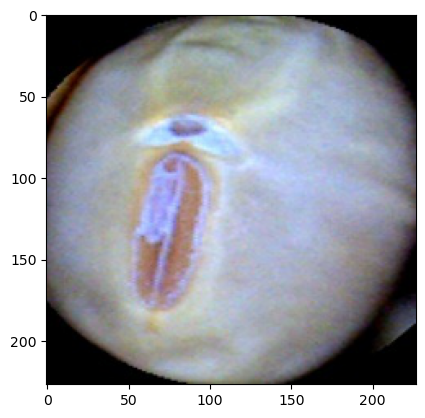

In [128]:
image_path = 'soybean_seeds/train/Skin-damaged soybeans/332.jpg'
image = plt.imread(image_path)

plt.imshow(image)
plt.axis('on')
plt.show()

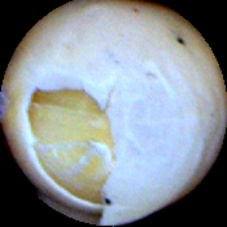

In [197]:
mri_img = Image.open('soybean_seeds/train/Skin-damaged soybeans/345.jpg')
display(mri_img)

###### Visualization of Data Split

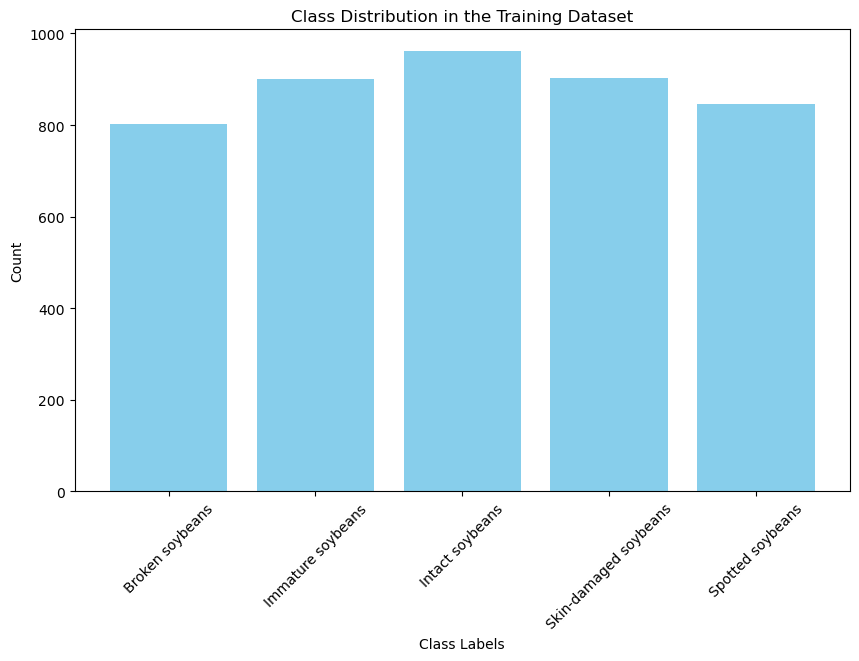

In [88]:
class_labels = train_generator.class_indices.keys()
class_counts = train_generator.classes

from collections import Counter
class_counts = dict(Counter(class_counts))

plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_counts.values(), color='skyblue')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution in the Training Dataset')
plt.xticks(rotation=45)
plt.show()

## First Model

In [91]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(227, 227, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [92]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [94]:
history = model.fit(
    train_generator,
    epochs = 10,
    batch_size = 300,
    validation_data = val_generator)

Epoch 1/10


2023-10-25 13:12:40.012948: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


148/148 [==============================] - ETA: 0s - loss: 1.3974 - accuracy: 0.3860

2023-10-25 13:14:54.641890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


148/148 [==============================] - 141s 954ms/step - loss: 1.3974 - accuracy: 0.3860 - val_loss: 1.1896 - val_accuracy: 0.4750
Epoch 2/10
148/148 [==============================] - 173s 1s/step - loss: 1.1239 - accuracy: 0.5356 - val_loss: 1.0640 - val_accuracy: 0.5682
Epoch 3/10
148/148 [==============================] - 199s 1s/step - loss: 0.9761 - accuracy: 0.6058 - val_loss: 0.8584 - val_accuracy: 0.6750
Epoch 4/10
148/148 [==============================] - 197s 1s/step - loss: 0.8285 - accuracy: 0.6829 - val_loss: 0.7282 - val_accuracy: 0.7295
Epoch 5/10
148/148 [==============================] - 200s 1s/step - loss: 0.7332 - accuracy: 0.7176 - val_loss: 0.7494 - val_accuracy: 0.6955
Epoch 6/10
148/148 [==============================] - 604s 4s/step - loss: 0.6776 - accuracy: 0.7375 - val_loss: 0.7273 - val_accuracy: 0.6864
Epoch 7/10
148/148 [==============================] - 197s 1s/step - loss: 0.6831 - accuracy: 0.7464 - val_loss: 0.7023 - val_accuracy: 0.7000
Epoch 8

In [95]:
model.save('soybean_seeds/first_cnn.h5')

In [96]:
test_results = model.evaluate(test_generator)

2023-10-25 13:57:50.191762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 14s 582ms/step - loss: 0.6295 - accuracy: 0.7821


### Evaluating First Model

In [311]:
predictions = model.predict(test_generator)

2023-10-26 13:02:42.074254: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 10s 433ms/step


In [312]:
predicted_classes = [np.argmax(prediction) for prediction in predictions]

In [313]:
report = classification_report(true_classes, predicted_classes)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.72      0.67       120
           1       0.76      0.93      0.83       135
           2       0.91      0.69      0.78       144
           3       0.76      0.69      0.72       135
           4       0.83      0.82      0.82       127

    accuracy                           0.77       661
   macro avg       0.78      0.77      0.77       661
weighted avg       0.78      0.77      0.77       661



In [314]:
confusion = confusion_matrix(true_classes, predicted_classes)

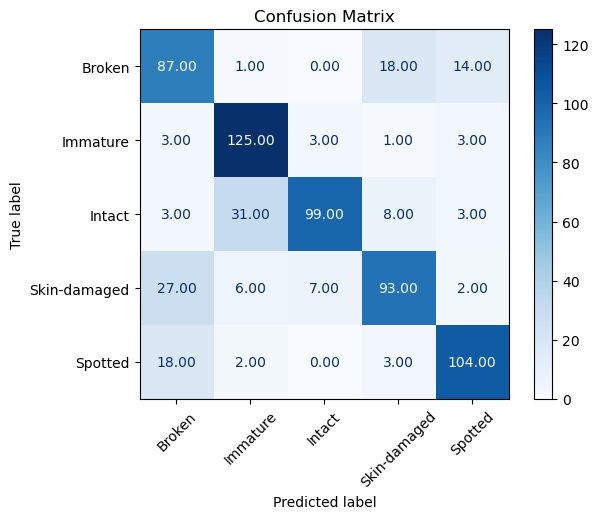

In [315]:
disp = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = modified_class_keys)
disp.plot(cmap = plt.cm.Blues, values_format = ".2f", xticks_rotation=45)
plt.title("Confusion Matrix")

plt.show()

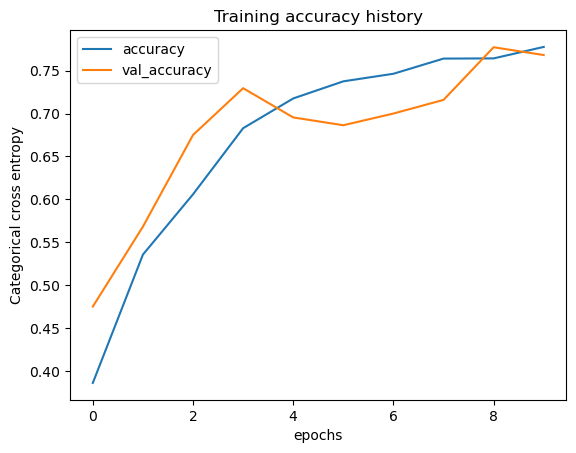

In [343]:
train_model_history = pd.DataFrame(history.history)
train_model_history.index.name = 'epochs'

col_list = ['accuracy', 'val_accuracy']
train_model_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training accuracy history')
plt.show()

## Second Model

In [129]:
model2 = Sequential()

model2.add(Conv2D(filters = 32,
                        kernel_size=(6, 6),
                        activation='relu',
                        input_shape=(227, 227, 3), kernel_regularizer = l2(5e-4)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((3, 3)))

model2.add(Conv2D(64, (4, 4), activation='relu', kernel_regularizer = l2(5e-4)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((3, 3)))

model2.add(Conv2D(128, (4, 4), activation='relu', kernel_regularizer = l2(5e-4)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((3, 3)))

# transition to dense fully-connected part of network
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(5, activation='softmax'))


In [130]:
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

In [131]:
model2.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [132]:
history2 = model2.fit(
    train_generator,
    epochs = 35,
    batch_size = 200,
    validation_data = val_generator,
    callbacks = [early_stopping])

Epoch 1/35


2023-10-25 15:33:25.966018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


148/148 [==============================] - ETA: 0s - loss: 1.3842 - accuracy: 0.4723

2023-10-25 15:35:55.501371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


148/148 [==============================] - 156s 1s/step - loss: 1.3842 - accuracy: 0.4723 - val_loss: 3.3612 - val_accuracy: 0.3000
Epoch 2/35
148/148 [==============================] - 199s 1s/step - loss: 1.0721 - accuracy: 0.6190 - val_loss: 2.8131 - val_accuracy: 0.3250
Epoch 3/35
148/148 [==============================] - 214s 1s/step - loss: 1.0327 - accuracy: 0.6439 - val_loss: 1.9974 - val_accuracy: 0.2455
Epoch 4/35
148/148 [==============================] - 155s 1s/step - loss: 0.9661 - accuracy: 0.6729 - val_loss: 4.9814 - val_accuracy: 0.2727
Epoch 5/35
148/148 [==============================] - 155s 1s/step - loss: 0.8612 - accuracy: 0.7117 - val_loss: 0.9895 - val_accuracy: 0.6386
Epoch 6/35
148/148 [==============================] - 231s 2s/step - loss: 0.8179 - accuracy: 0.7312 - val_loss: 1.7864 - val_accuracy: 0.4159
Epoch 7/35
148/148 [==============================] - 294s 2s/step - loss: 0.7693 - accuracy: 0.7439 - val_loss: 1.1263 - val_accuracy: 0.5841
Epoch 8/35

In [133]:
model2.save('soybean_seeds/second_cnn.h5')

In [285]:
test_results_2 = model2.evaluate(test_generator)

2023-10-26 12:58:46.619997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 11s 434ms/step - loss: 0.6516 - accuracy: 0.7943


In [286]:
predictions2 = model2.predict(test_generator)

2023-10-26 12:59:00.576409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 11s 438ms/step


### Evaluating Model 2

In [291]:
class_keys = list(test_generator.class_indices.keys())
modified_class_keys = [k[:-9] for k in class_keys]
modified_class_keys

['Broken', 'Immature', 'Intact', 'Skin-damaged', 'Spotted']

In [292]:
true_classes = test_generator.classes

In [293]:
predicted_classes2 = [np.argmax(prediction) for prediction in predictions2]

In [294]:
report = classification_report(true_classes, predicted_classes2)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.61      0.68       120
           1       0.84      0.84      0.84       135
           2       0.76      0.82      0.79       144
           3       0.90      0.70      0.79       135
           4       0.65      0.88      0.75       127

    accuracy                           0.77       661
   macro avg       0.79      0.77      0.77       661
weighted avg       0.79      0.77      0.77       661



In [295]:
confusion2 = confusion_matrix(true_classes, predicted_classes2)

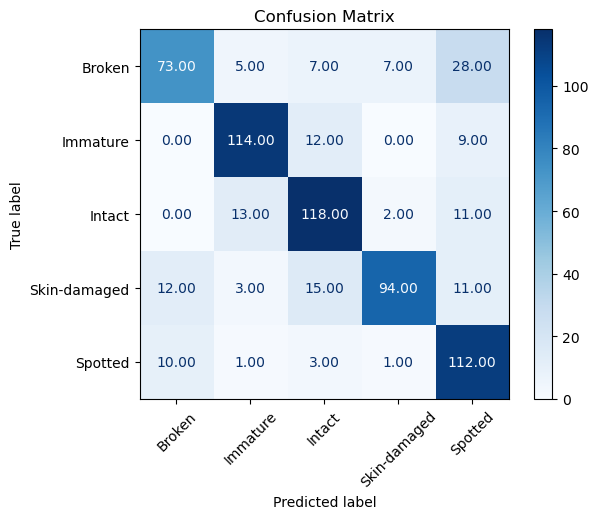

In [296]:
disp = ConfusionMatrixDisplay(confusion_matrix = confusion2, display_labels = modified_class_keys)
disp.plot(cmap = plt.cm.Blues, values_format = ".2f", xticks_rotation=45)
plt.title("Confusion Matrix")

plt.show()

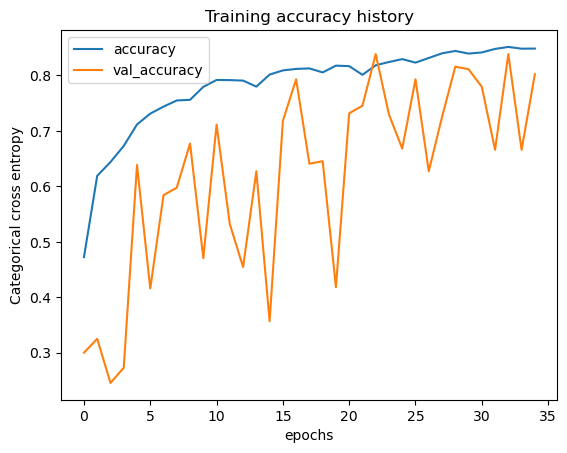

In [342]:
train_model2_history = pd.DataFrame(history2.history)
train_model2_history.index.name = 'epochs'

col_list = ['accuracy', 'val_accuracy']
train_model2_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training accuracy history')
plt.show()

## Third Model

In [162]:
model3 = Sequential()

model3.add(Conv2D(filters = 32,
                        kernel_size=(6, 6),
                        activation='relu',
                        input_shape=(227, 227, 3), kernel_regularizer = l2(5e-4)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((3, 3)))

model3.add(Conv2D(64, (4, 4), activation='relu', kernel_regularizer = l2(5e-4)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((3, 3)))

model3.add(Conv2D(128, (4, 4), activation='relu', kernel_regularizer = l2(5e-4)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((3, 3)))

# transition to dense fully-connected part of network
model3.add(Flatten())
model3.add(Dense(128, activation='relu', use_bias = True, activity_regularizer = l2(5e-4)))
model3.add(Dropout(0.10))

model3.add(Dense(128, activation='relu', use_bias = True, activity_regularizer = l2(5e-4)))
model3.add(Dropout(0.10))

model3.add(Dense(64, activation='relu', use_bias = True))

model3.add(Dense(5, activation='softmax'))


In [163]:
model3.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [165]:
history3 = model3.fit(
    train_generator,
    epochs = 50,
    batch_size = 200,
    validation_data = val_generator,
    callbacks = [early_stopping])

Epoch 1/50


2023-10-25 19:53:27.851985: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


148/148 [==============================] - 155s 1s/step - loss: 0.9437 - accuracy: 0.7124 - val_loss: 1.7761 - val_accuracy: 0.3886
Epoch 2/50
148/148 [==============================] - 154s 1s/step - loss: 0.9556 - accuracy: 0.7087 - val_loss: 4.3486 - val_accuracy: 0.2818
Epoch 3/50
148/148 [==============================] - 155s 1s/step - loss: 0.9006 - accuracy: 0.7248 - val_loss: 1.1427 - val_accuracy: 0.6091
Epoch 4/50
148/148 [==============================] - 157s 1s/step - loss: 0.8346 - accuracy: 0.7543 - val_loss: 0.9065 - val_accuracy: 0.6864
Epoch 5/50
148/148 [==============================] - 875s 6s/step - loss: 0.8528 - accuracy: 0.7450 - val_loss: 0.9559 - val_accuracy: 0.7091
Epoch 6/50
148/148 [==============================] - 205s 1s/step - loss: 0.8525 - accuracy: 0.7473 - val_loss: 1.2507 - val_accuracy: 0.5295
Epoch 7/50
148/148 [==============================] - 193s 1s/step - loss: 0.7733 - accuracy: 0.7740 - val_loss: 0.8897 - val_accuracy: 0.7432
Epoch 8/50

In [173]:
model3.save('soybean_seeds/third_cnn.h5')

In [166]:
test_results_3 = model3.evaluate(test_generator)

2023-10-25 21:46:58.440547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 11s 457ms/step - loss: 0.6657 - accuracy: 0.7912


### Evaluating Model 3

In [299]:
predictions3 = model3.predict(test_generator)

2023-10-26 13:01:03.162594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 11s 462ms/step


In [300]:
predicted_classes3 = [np.argmax(prediction) for prediction in predictions3]

In [301]:
confusion3 = confusion_matrix(true_classes, predicted_classes3)

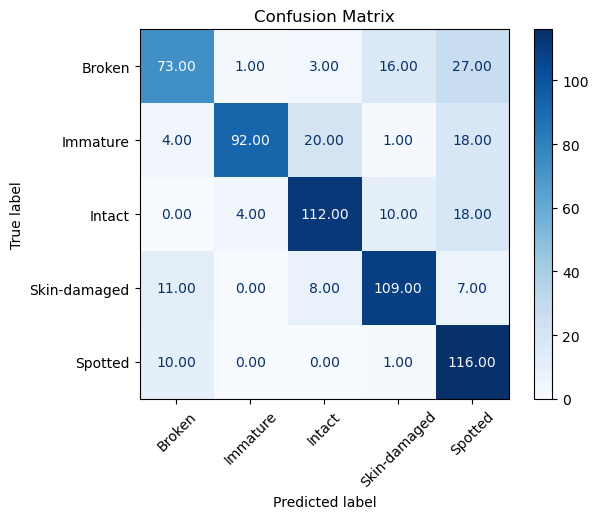

In [302]:
disp = ConfusionMatrixDisplay(confusion_matrix = confusion3, display_labels = modified_class_keys)
disp.plot(cmap = plt.cm.Blues, values_format = ".2f", xticks_rotation=45)
plt.title("Confusion Matrix")

plt.show()

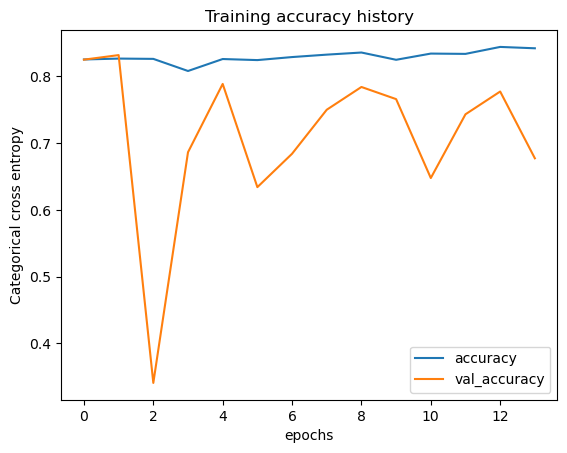

In [344]:
train_model3_history = pd.DataFrame(history3.history)
train_model3_history.index.name = 'epochs'

col_list = ['accuracy', 'val_accuracy']
train_model3_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training accuracy history')
plt.show()

## Model 4

In [182]:
model4 = Sequential()

model4.add(Conv2D(filters = 32,
                        kernel_size=(6, 6),
                        activation='relu',
                        input_shape=(227, 227, 3), padding = 'valid', kernel_initializer= 'glorot_uniform',
                  kernel_regularizer = l2(5e-4)))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((3, 3)))

model4.add(Conv2D(64, (4, 4), activation='relu', padding = 'valid', kernel_initializer= 'glorot_uniform', 
                  kernel_regularizer = l2(5e-4)))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((3, 3)))

model4.add(Conv2D(128, (4, 4), activation='relu', padding = 'valid', kernel_initializer= 'glorot_uniform',
                  kernel_regularizer = l2(5e-4)))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((3, 3)))

# transition to dense fully-connected part of network
model4.add(Flatten())
model4.add(Dense(128, activation='relu', use_bias = True, kernel_initializer='glorot_uniform',
                 activity_regularizer = l2(5e-4)))
model4.add(Dropout(0.10))

model4.add(Dense(128, activation='relu', use_bias = True, kernel_initializer='glorot_uniform',
                 activity_regularizer = l2(5e-4)))
model4.add(Dropout(0.10))

model4.add(Dense(64, activation='relu', use_bias = True))

model4.add(Dense(64, activation='relu', use_bias = True))

model4.add(Dense(5, activation='softmax'))

In [183]:
model4.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [187]:
history4 = model4.fit(
    train_generator,
    epochs = 50,
    batch_size = 400,
    validation_data = val_generator)

Epoch 1/50


2023-10-26 00:20:24.621476: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


148/148 [==============================] - ETA: 0s - loss: 1.2543 - accuracy: 0.5861

2023-10-26 00:23:01.611806: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


148/148 [==============================] - 164s 1s/step - loss: 1.2543 - accuracy: 0.5861 - val_loss: 2.9595 - val_accuracy: 0.3205
Epoch 2/50
148/148 [==============================] - 155s 1s/step - loss: 1.0936 - accuracy: 0.6593 - val_loss: 2.7965 - val_accuracy: 0.3523
Epoch 3/50
148/148 [==============================] - 155s 1s/step - loss: 0.9612 - accuracy: 0.7074 - val_loss: 1.3949 - val_accuracy: 0.5682
Epoch 4/50
148/148 [==============================] - 162s 1s/step - loss: 0.9569 - accuracy: 0.7078 - val_loss: 1.5071 - val_accuracy: 0.4114
Epoch 5/50
148/148 [==============================] - 818s 6s/step - loss: 0.8948 - accuracy: 0.7325 - val_loss: 2.6672 - val_accuracy: 0.4318
Epoch 6/50
148/148 [==============================] - 156s 1s/step - loss: 0.8801 - accuracy: 0.7364 - val_loss: 1.1166 - val_accuracy: 0.6227
Epoch 7/50
148/148 [==============================] - 161s 1s/step - loss: 0.8611 - accuracy: 0.7471 - val_loss: 1.2789 - val_accuracy: 0.5364
Epoch 8/50

In [ ]:
# Increased batch size, icreased amount of padding, included a kernel initializer

In [188]:
model4.save('soybean_seeds/fourth_cnn.h5')

In [189]:
test_results_4 = model4.evaluate(test_generator)

2023-10-26 09:06:30.173026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 11s 462ms/step - loss: 0.7044 - accuracy: 0.7958


In [304]:
model4.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_108 (Conv2D)         (None, 222, 222, 32)      3488      
                                                                 
 batch_normalization_131 (Ba  (None, 222, 222, 32)     128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_109 (Conv2D)         (None, 71, 71, 64)        32832     
                                                                 
 batch_normalization_132 (Ba  (None, 71, 71, 64)       256       
 tchNormalization)                                               
                                                     

### Evaluating Model 4

In [305]:
predictions4 = model4.predict(test_generator)

2023-10-26 13:02:00.867538: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 10s 440ms/step


In [306]:
predicted_classes4 = [np.argmax(prediction) for prediction in predictions4]

In [307]:
confusion4 = confusion_matrix(true_classes, predicted_classes4)

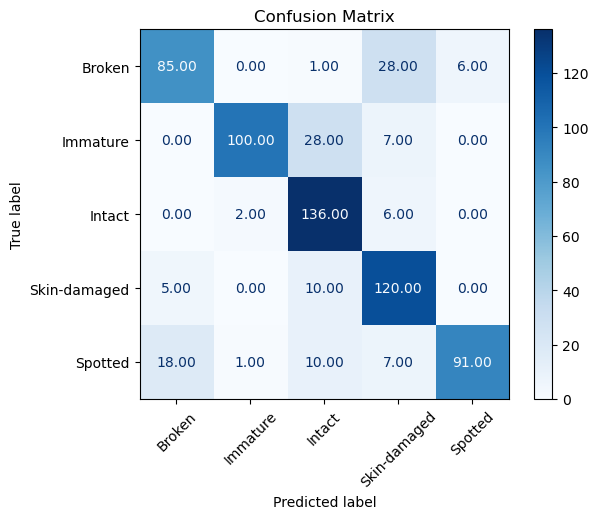

In [308]:
disp = ConfusionMatrixDisplay(confusion_matrix = confusion4, display_labels = modified_class_keys)
disp.plot(cmap = plt.cm.Blues, values_format = ".2f", xticks_rotation=45)
plt.title("Confusion Matrix")

plt.show()

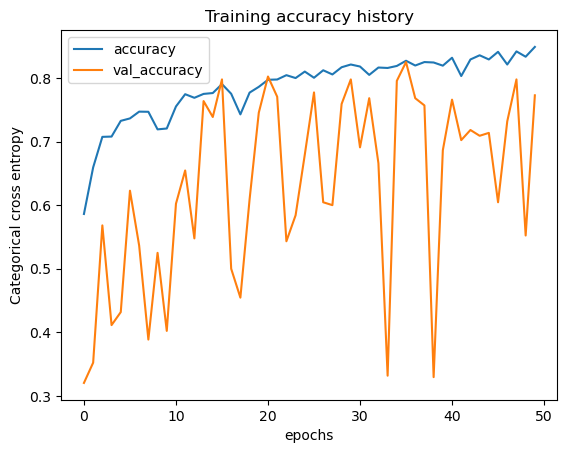

In [345]:
train_model4_history = pd.DataFrame(history4.history)
train_model4_history.index.name = 'epochs'

col_list = ['accuracy', 'val_accuracy']
train_model4_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training accuracy history')
plt.show()

## Final Analysis

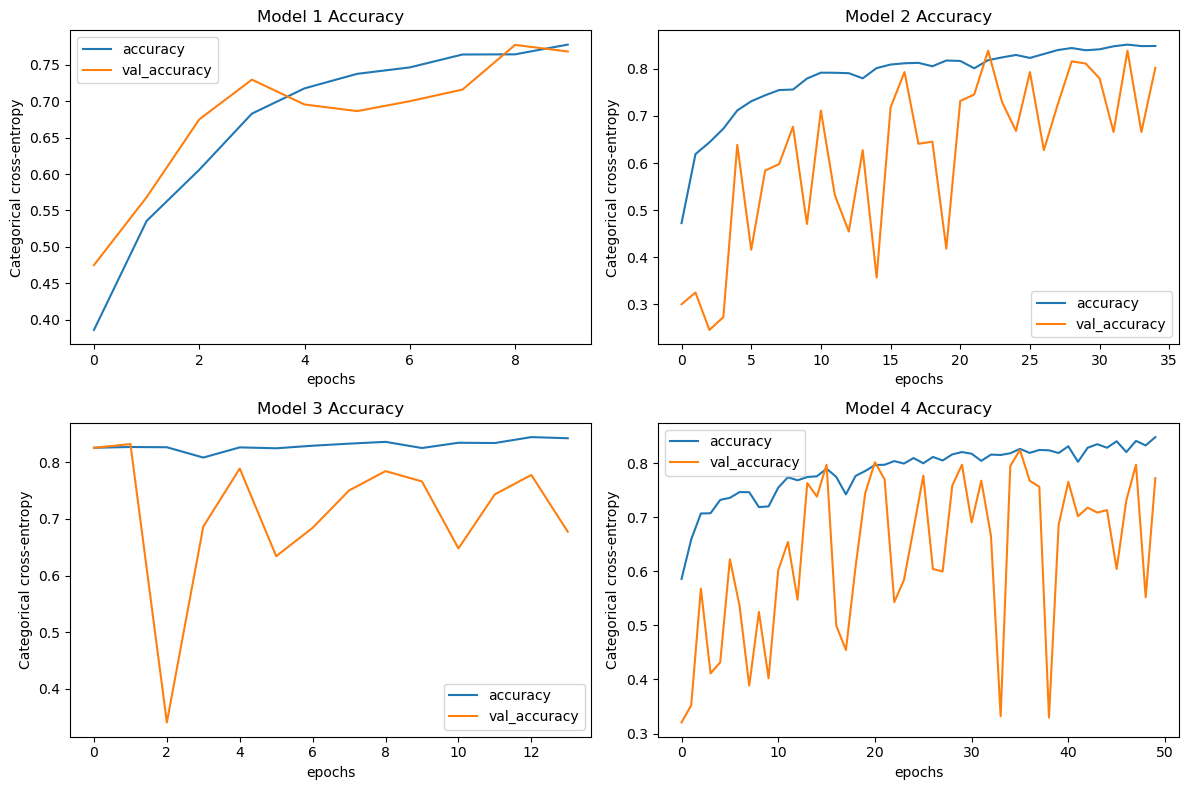

In [346]:
model_histories = [train_model_history, train_model2_history, train_model3_history, train_model4_history]
col_list = ['accuracy', 'val_accuracy']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, model_history in enumerate(model_histories):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    model_history[col_list].plot(ax = ax)
    ax.set_ylabel('Categorical cross-entropy')
    ax.set_title(f'Model {i + 1} Accuracy')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 422ms/step


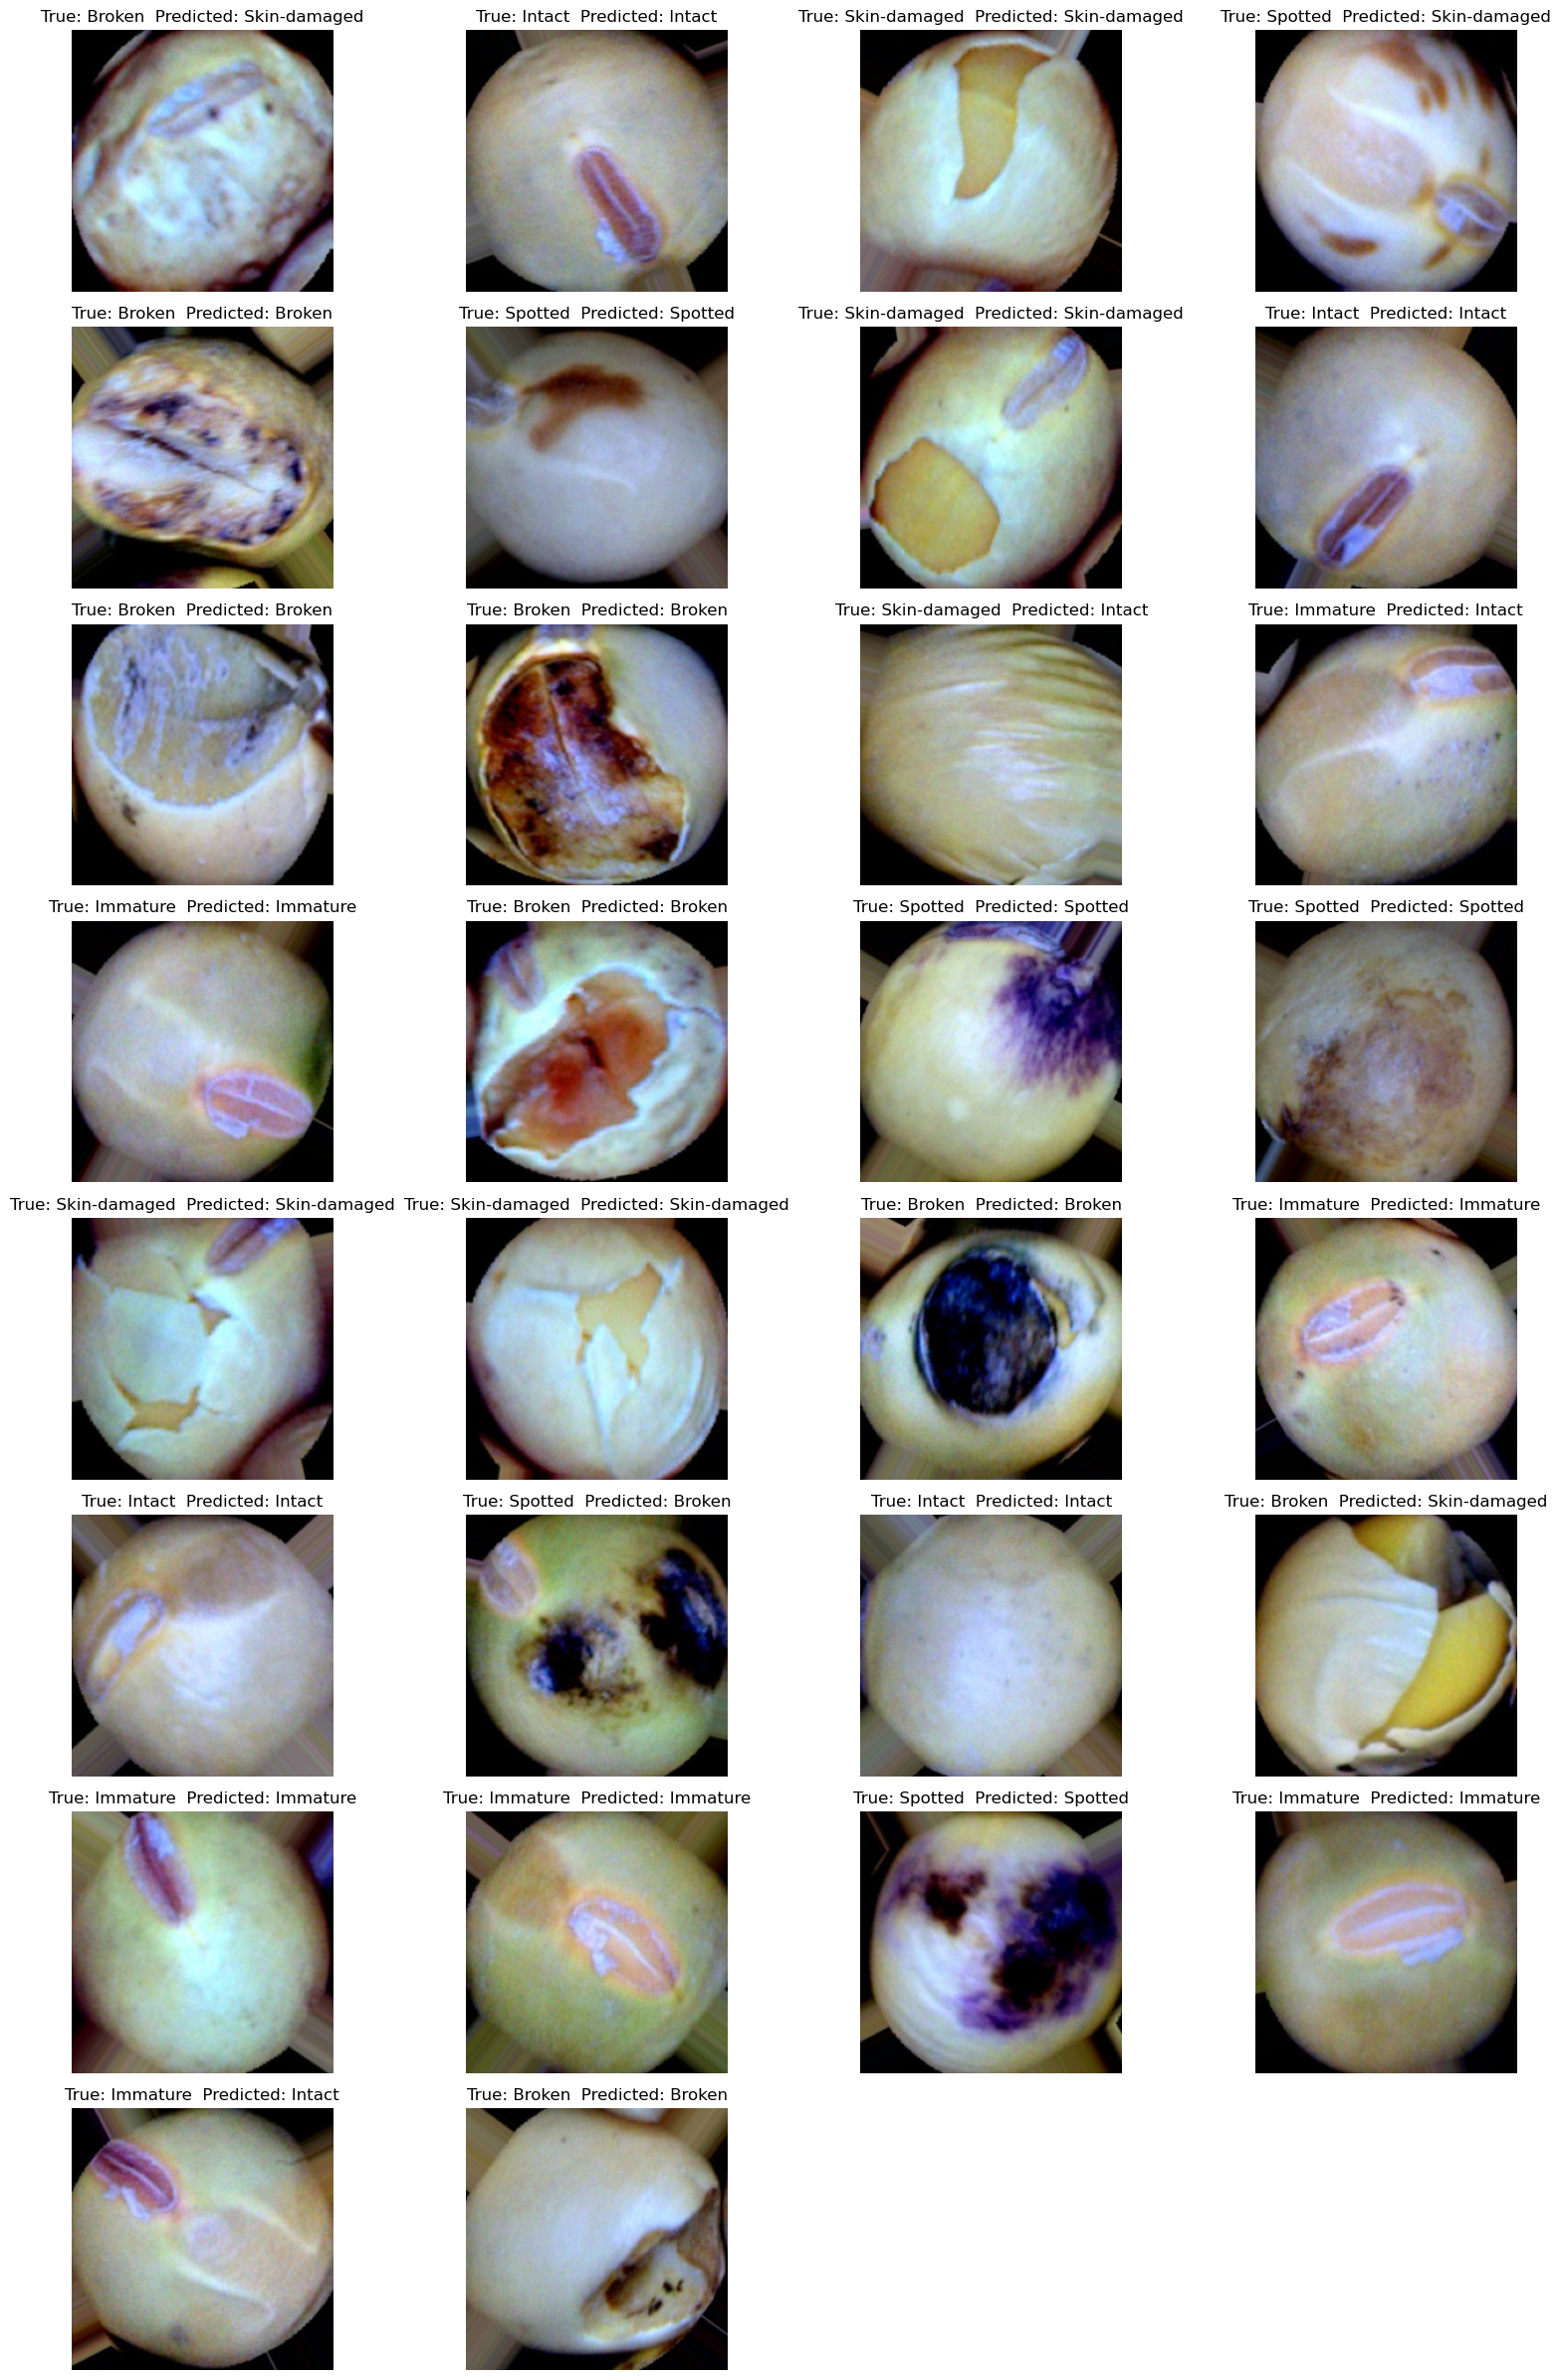

In [339]:
classes = {value: key[:-9] for key, value in train_generator.class_indices.items()}

plt.figure(figsize=(16, 24))

# Manually extract a batch of data from the test_data generator
images, labels = train_generator[8]

prediction_batch_probabilities = model4.predict(images)
predicted_batch_classes = np.argmax(prediction_batch_probabilities, axis=1)
true_batch_classes = np.argmax(labels, axis=1)
for i in range(min(32, len(images))):
    ax = plt.subplot(8, 4, i+1)
    plt.imshow(images[i])
    plt.title(f'True: {classes[true_batch_classes[i]]}  Predicted: {classes[predicted_batch_classes[i]]}')
    plt.axis('off')
    
plt.tight_layout()
plt.show()
   
